In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

with open('./basketball_train.pkl','rb') as train_data:
    train = pickle.load(train_data)
with open('./basketball_test.pkl','rb') as test_data:
    test = pickle.load(test_data)


In [4]:
#import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#find best k, range from 3 to half of the number of data, '//'--> 나누고 소수점 버리기
max_k_range = train.shape[0]//2
k_list=[]
for i in range(3,max_k_range,2):
    k_list.append(i)
    
cross_validation_scores =[]
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [6]:
#10-fold cross validation
for k in k_list:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring = 'accuracy')
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9196428571428573,
 0.9214285714285715,
 0.9339285714285716,
 0.9339285714285716,
 0.9371031746031747,
 0.9228174603174605,
 0.9371031746031747,
 0.9117063492063492,
 0.9259920634920636,
 0.9259920634920636,
 0.9117063492063492,
 0.884920634920635,
 0.884920634920635,
 0.8438492063492063,
 0.8438492063492063,
 0.8438492063492063,
 0.8313492063492063,
 0.8313492063492063,
 0.8202380952380952]

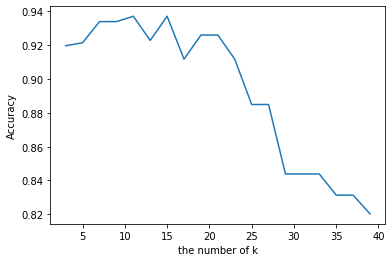

In [7]:
#visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [8]:
#find best k
cvs=cross_validation_scores
k=k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k:" + str(k))


The best number of k:11


In [9]:
#2개의 특징으로 예측하기(3점슛, 블로킹)

#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=k)

#select data features
x_train=train[['3P','BLK']]

#select target value
y_train = train[['Pos']]

#setup knn using train data
knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [11]:
#select data feature to be used for prediction
x_test = test[['3P','BLK']]

#select target value
y_test = test[['Pos']]

#test
pred = knn.predict(x_test)

#check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C
